Intro to Tensorflow
---

Import tensorflow and other needed libraries here:

In [1]:
# TODO: Add imports.
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

Clear the Graph
---
Clear the default graph to reset everything back to default

In [2]:
# TODO: Clear the tensorflow graph
tf.reset_default_graph()

test_constant = tf.constant(10.0, dtype=tf.float32)
add_one_operation = test_constant + 1

Set up Placeholders
---
Placeholders are places you can feed data into your model. They indicate a value that you'll feed in later when the network is run.

In [16]:
# TODO: Create placeholders
tf.reset_default_graph()

input_data = tf.placeholder(dtype=tf.float32, shape=[None, 2])

double_operation = input_data * 2


Variables
---
Variables keep their value between runs. These are the building blocks of machine learning, and represent the parameters that will be tuned as your model trains

In [2]:
# TODO: Create variables
tf.reset_default_graph()

input_data = tf.placeholder(dtype=tf.float32, shape=None)
output_data = tf.placeholder(dtype=tf.float32, shape=None)

slope = tf.Variable(0.5, dtype=tf.float32)
intercept = tf.Variable(3, dtype=tf.float32)

model_operation = slope * input_data + intercept

error = model_operation - output_data
squared_error = tf.square(error)
loss = tf.reduce_mean(squared_error)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.005)
train = optimizer.minimize(loss)

Running a Session
---
Once your graph is built, you can start a session. Putting the session in a `with` statement allows the session to automatically close once the statement finishes:
```
with tf.Session() as sess:
    # Run the session in here
    ...
# Session closes when you get here
```

[2.0175998, 3.1085]


[2.6919174, 1.0632626]


[2.8137372, -0.31337368]


[2.8940325, -1.2207618]


[2.9469581, -1.8188518]


[2.981843, -2.2130737]


[3.004837, -2.4729187]


[3.0199931, -2.6441913]
[3.0299826, -2.7570822]


[3.0365674, -2.8314931]


[3.0409079, -2.8805416]


[3.0437684, -2.9128687]


[3.0456541, -2.9341769]


[3.0468969, -2.9482224]


[3.0477161, -2.9574797]


[3.0482559, -2.9635808]


[3.0486119, -2.967603]


[3.0488465, -2.9702544]


[3.0490012, -2.972002]


[3.049103, -2.9731536]


22.9561


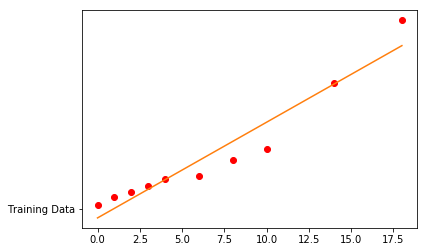

In [5]:
# TODO: Run a session

init = tf.global_variables_initializer()

x_values = [0, 1, 2, 3, 4, 6, 8, 10, 14, 18]
y_values = [1.1, 3.6, 5.2, 7.2, 9.3, 10.5, 15.6, 19, 40, 60]

with tf.Session() as sess:
    sess.run(init)
    for i in range(2000):
        sess.run(train, feed_dict={input_data:x_values, output_data:y_values})
        if i % 100 == 0:
            print(sess.run([slope, intercept]))
            #plt.plot(x_values, sess.run(model_operation, feed_dict={input_data:x_values}))
    
    print(sess.run(loss, feed_dict={input_data:x_values, output_data:y_values}))
    plt.plot(x_values, y_values, 'ro', 'Training Data')
    plt.plot(x_values, sess.run(model_operation, feed_dict={input_data:x_values}))
    
    plt.show()

Neurons and Neural Networks
---
Tensorflow provides functions to easily create layers of neurons for a neural network.

In [8]:
# TODO: Create a neural network